In [73]:
import os
import numpy as np
import pandas as pd
import sqlite3 as sq
import statsmodels.api as sm
import statsmodels.formula.api as smf
from linearmodels import PooledOLS
from linearmodels import PanelOLS
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import cross_validate
%matplotlib inline

In [74]:
os.chdir (r'C:\Users\hitpr\Desktop\MSBA\2nd semester\Python-Programming in Data Science\Exam\final exam')

In [75]:
#connect to the database
db = sq.connect('wooldridge.db')

#create cursor for the connected database
cursor = db.cursor()

#run the sql command and fetch all the data for the table jtrain
cursor.execute('Select * from ceosal2')

#store all the data in the dataframe
data = pd.DataFrame(cursor.fetchall())

cursor.execute('Select * from ceosal2_labels')

labels_description = pd.DataFrame(cursor.fetchall())

In [76]:
labels_description

,0,1,2,3,4
0,0,salary,int,%9.0g,"1990 compensation, $1000s"
1,1,age,byte,%9.0g,in years
2,2,college,byte,%9.0g,=1 if attended college
3,3,grad,byte,%9.0g,=1 if attended graduate school
4,4,comten,byte,%9.0g,years with company
5,5,ceoten,byte,%9.0g,years as ceo with company
6,6,sales,float,%9.0g,"1990 firm sales, millions"
7,7,profits,int,%9.0g,"1990 profits, millions"
8,8,mktval,float,%9.0g,"market value, end 1990, mills."
9,9,lsalary,float,%9.0g,log(salary)


In [77]:
#store the labeles of the jtrain
cursor.execute('Select * from ceosal2_labels')
labels = np.array(pd.DataFrame(cursor.fetchall())[1])
data = data.iloc[:,1:16]
data.columns = labels
#labels.shape

In [78]:
labels

array(['salary', 'age', 'college', 'grad', 'comten', 'ceoten', 'sales',
       'profits', 'mktval', 'lsalary', 'lsales', 'lmktval', 'comtensq',
       'ceotensq', 'profmarg'], dtype=object)

In [79]:
data.head(5)

,salary,age,college,grad,comten,ceoten,sales,profits,mktval,lsalary,lsales,lmktval,comtensq,ceotensq,profmarg
0,1161,49,1,1,9,2,6200,966,23200,7.057037,8.732305,10.051910,81,4,15.580650
1,600,43,1,1,10,10,283,48,1100,6.396930,5.645447,7.003066,100,100,16.961130
2,379,51,1,1,9,3,169,40,1100,5.937536,5.129899,7.003066,81,9,23.668640
3,651,55,1,0,22,22,1100,-54,1000,6.478509,7.003066,6.907755,484,484,-4.909091
4,497,44,1,1,8,6,351,28,387,6.208590,5.860786,5.958425,64,36,7.977208


         age  college  grad  comten  ceoten    sales  profits   mktval  \
salary                                                                   
100     61.0      1.0   1.0    26.0    26.0   2700.0    394.0  10100.0   
129     66.0      1.0   1.0     4.0     4.0     59.0     28.0    412.0   
174     69.0      1.0   0.0    13.0    13.0     29.0      6.0    390.0   
185     58.0      1.0   0.0    39.0     1.0    766.0     49.0    560.0   
218     57.0      1.0   1.0    33.0     5.0    504.0     41.0    421.0   
245     44.0      1.0   1.0     7.0     7.0    135.0     24.0    558.0   
246     51.0      1.0   0.0     8.0     8.0     78.0     13.0    458.0   
264     63.0      1.0   0.0    42.0     3.0    334.0     43.0    480.0   
270     43.0      1.0   0.0    15.0     2.0    150.0     28.0    713.0   
300     77.0      0.0   0.0    45.0    26.0   6900.0    483.0   4700.0   
308     45.0      1.0   1.0    14.0    14.0    210.0     39.0   1900.0   
310     40.0      1.0   0.0    18.0   

(array([134.,  38.,   4.,   0.,   1.]),
 array([ 100. , 1139.8, 2179.6, 3219.4, 4259.2, 5299. ]),
 <a list of 5 Patch objects>)

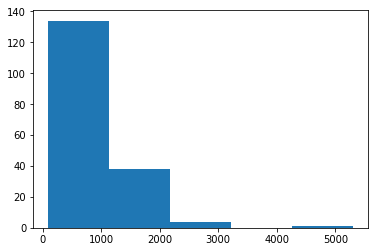

In [80]:
print(data.groupby(['salary']).mean())
plt.hist(data['salary'], bins=5)

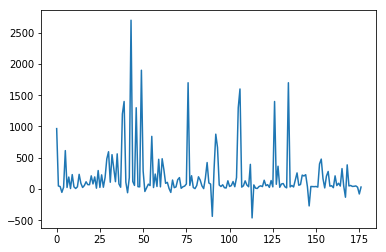

In [81]:
data['profits'].plot()

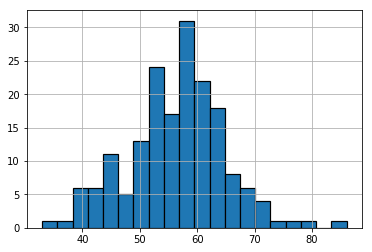

In [82]:
data.age.hist(bins = 20, edgecolor='black', linewidth=1.2)

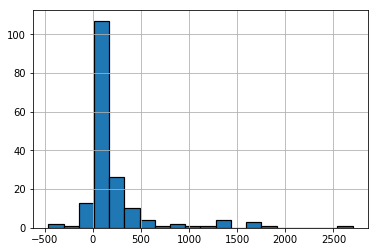

In [83]:
data.profits.hist(bins = 20, edgecolor='black', linewidth=1.2)

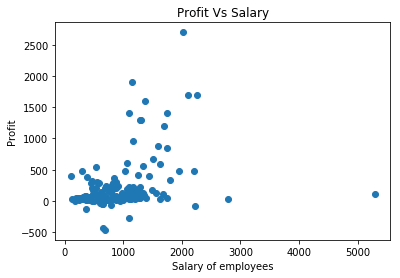

In [84]:
plt.scatter(data.salary, data.profits)
plt.xlabel("Salary of employees")
plt.ylabel("Profit")
plt.title("Profit Vs Salary")
plt.show()

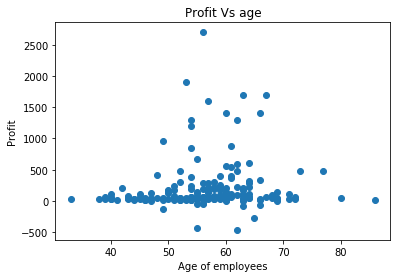

In [85]:
plt.scatter(data.age, data.profits)
plt.xlabel("Age of employees")
plt.ylabel("Profit")
plt.title("Profit Vs age")
plt.show()

In [86]:
yData = data.iloc[:,0]
xData = data[['age', 'college','grad', 'comten','ceoten','sales','profits','mktval', 'lsales','comtensq','ceotensq','lmktval', 'profmarg']]
model_1 = smf.OLS(yData, sm.add_constant(xData)).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     5.599
Date:                Thu, 02 Aug 2018   Prob (F-statistic):           2.18e-08
Time:                        20:53:40   Log-Likelihood:                -1346.5
No. Observations:                 177   AIC:                             2721.
Df Residuals:                     163   BIC:                             2766.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -647.2340    565.003     -1.146      0.2

In [87]:
yData = data.iloc[:,9]
xData = data[['age', 'college','grad', 'comten','ceoten','sales','profits','mktval', 'lsales','comtensq','ceotensq','lmktval', 'profmarg']]
model_2 = smf.OLS(yData, sm.add_constant(xData)).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                lsalary   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     7.893
Date:                Thu, 02 Aug 2018   Prob (F-statistic):           4.34e-12
Time:                        20:53:41   Log-Likelihood:                -118.80
No. Observations:                 177   AIC:                             265.6
Df Residuals:                     163   BIC:                             310.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6151      0.549      8.405      0.0

In [88]:
data.head(2)

,salary,age,college,grad,comten,ceoten,sales,profits,mktval,lsalary,lsales,lmktval,comtensq,ceotensq,profmarg
0,1161,49,1,1,9,2,6200,966,23200,7.057037,8.732305,10.051910,81,4,15.58065
1,600,43,1,1,10,10,283,48,1100,6.396930,5.645447,7.003066,100,100,16.96113


In [89]:
yData = data.iloc[:,9]
xData = data[['ceoten','lsales','comtensq','ceotensq','lmktval', 'profmarg']]
model_3 = smf.OLS(yData, sm.add_constant(xData)).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                lsalary   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     16.89
Date:                Thu, 02 Aug 2018   Prob (F-statistic):           2.97e-15
Time:                        20:53:44   Log-Likelihood:                -120.63
No. Observations:                 177   AIC:                             255.3
Df Residuals:                     170   BIC:                             277.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3858      0.254     17.239      0.0

In [90]:
yData = data.iloc[:,9]
xData = data[['ceoten','lsales','comtensq','lmktval']]
model_4 = smf.OLS(yData, sm.add_constant(xData)).fit()
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                lsalary   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     23.15
Date:                Thu, 02 Aug 2018   Prob (F-statistic):           2.54e-15
Time:                        20:53:45   Log-Likelihood:                -123.89
No. Observations:                 177   AIC:                             257.8
Df Residuals:                     172   BIC:                             273.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5103      0.252     17.905      0.0

In [91]:
xData = data[['ceoten','lsales','comtensq','lmktval']]
model_5 = PCA(n_components=2)
model_5.fit(xData)
X_2D = model_5.transform(xData)

In [92]:
xData['PCA1'] = X_2D[:,0]
xData['PCA2'] = X_2D[:,1]

C:\Users\hitpr\Anaconda3.6\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\hitpr\Anaconda3.6\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [93]:
yData = data.iloc[:,9]
xData_pca = xData[['PCA2']]
model_6 = smf.OLS(yData, sm.add_constant(xData_pca)).fit()
print(model_6.summary())

                            OLS Regression Results                            
Dep. Variable:                lsalary   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     2.823
Date:                Thu, 02 Aug 2018   Prob (F-statistic):             0.0947
Time:                        20:53:49   Log-Likelihood:                -160.60
No. Observations:                 177   AIC:                             325.2
Df Residuals:                     175   BIC:                             331.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5828      0.045    145.252      0.0

In [94]:
y_pred = model_6.predict(sm.add_constant(xData_pca))

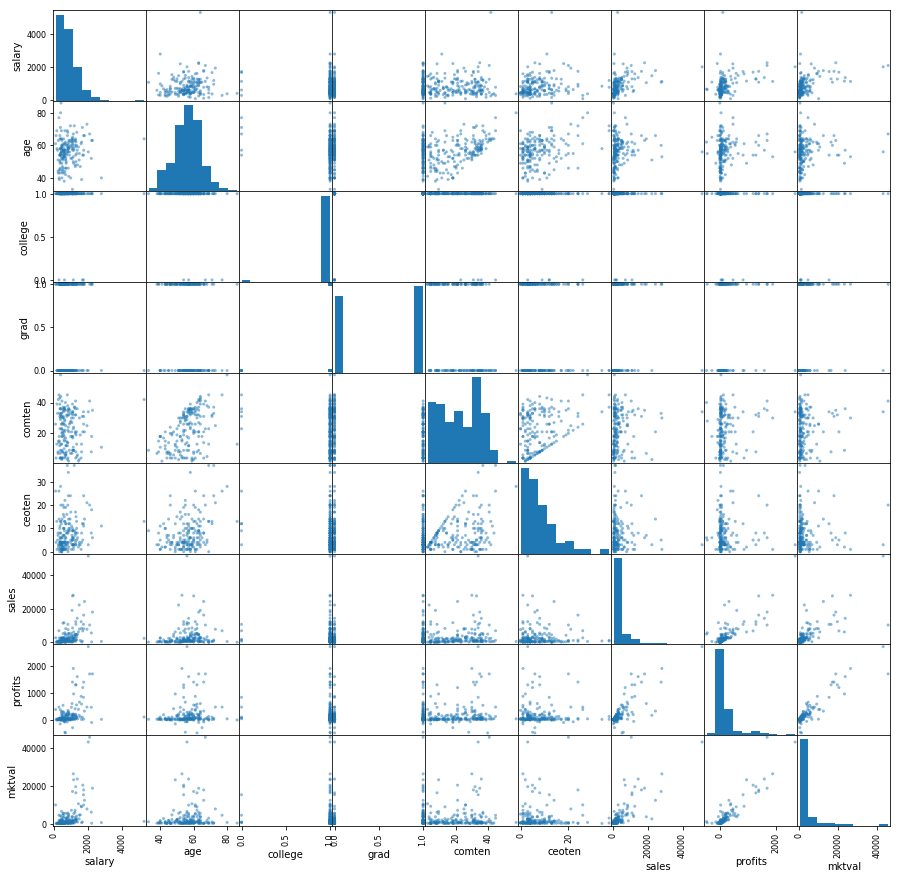

In [95]:
# Scatterplot Matrix
# Checking the non-linear relationship between the variables
scatter_matrix(data.loc[:,'salary':'mktval'],figsize=(15, 15))
plt.show()
#Result : mktval, salary,comten,ceoten,sales, profits are skewed and does not follow normal distribution as per the plot

In [96]:
from sklearn.cluster import KMeans
for i in range(10):
    kmeans = KMeans(n_clusters=2, random_state=0).fit(data)
kmeans.cluster_centers_
kmeans.labels_
wss = kmeans.inertia_
wss

5630648069.850337

In [97]:
wss=np.zeros((10,))
for i in range(10):
    kmeans = KMeans(n_clusters=i+1, random_state=0).fit(data)
    wss[i] = kmeans.inertia_

<IPython.core.display.Javascript object>


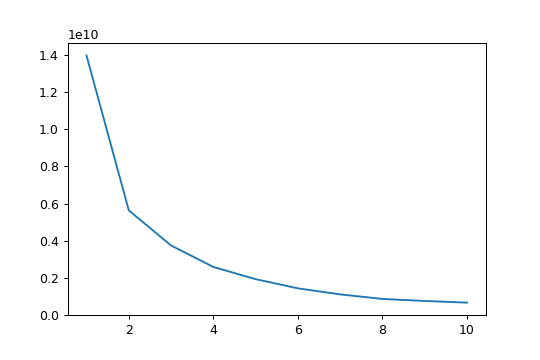

In [98]:
%matplotlib notebook
fig = plt.figure()
plt.plot(np.arange(1,11),wss)
plt.show()